In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.feature_selection import SelectKBest,mutual_info_classif

# Load, fill, drop, feature engineering

In [ ]:
df = pd.read_csv('01_dataset.csv')

for col in df.select_dtypes('number').columns:
    df[col].fillna(df[col].mean(), inplace=True)

df.drop([ "CREDIT_CARD_MONTH_SINCE_10DPD","CREDIT_CARD_MONTH_SINCE_30DPD","CREDIT_CARD_MONTH_SINCE_60DPD","CREDIT_CARD_MONTH_SINCE_90DPD", 'CREDIT_CARD_NUMBER_OF_LATE_PAYMENT'], inplace = True, axis = 1)

df_t = df[['SHORT_TERM_COUNT', 'MID_TERM_COUNT', 'LONG_TERM_COUNT', 'label']].copy(deep=True)
df_t['MANY_SHORT'] = np.where(df_t['SHORT_TERM_COUNT'] >= 4, 1, 0)
df_t['MANY_MID'] = np.where(df_t['MID_TERM_COUNT'] >= 4, 1, 0)
df_t['MANY_LONG'] = np.where(df_t['LONG_TERM_COUNT'] >= 4, 1, 0)
df_t['Theory 1'] = (df_t['MANY_SHORT'] * 10 + df_t['MANY_MID'] * 5 + df_t['MANY_LONG']) / 15
df['Diff_in_term_count'] = df_t['Theory 1']

df_t = df[['NUMBER_OF_LOANS', 'NUMBER_OF_LOANS_BANK', 'NUMBER_OF_LOANS_NON_BANK', 'label']].copy(deep=True)
df_t['MANY_LOANS'] = np.where(df_t['NUMBER_OF_LOANS'] >= 4, 1, 0)
df_t['MANY_LOANS_BANK'] = np.where(df_t['NUMBER_OF_LOANS_BANK'] >= 4, 1, 0)
df_t['MANY_LOANS_NON_BANK'] = np.where(df_t['NUMBER_OF_LOANS_NON_BANK'] >= 4, 1, 0)
df_t['Theory 1'] = df_t.iloc[:, -3:].sum(axis=1)
df['Diff_in_num_loan'] = df_t['Theory 1']

df_t = df[['NUMBER_OF_RELATIONSHIP', 'NUMBER_OF_RELATIONSHIP_BANK', 'NUMBER_OF_RELATIONSHIP_NON_BANK', 'label']].copy(deep=True)
# df_t.median()
df_t['MANY_RELATIONSHIP'] = np.where(df_t['NUMBER_OF_RELATIONSHIP'] >= 4, 1, 0)
df_t['MANY_RELATIONSHIP_BANK'] = np.where(df_t['NUMBER_OF_RELATIONSHIP_BANK'] >= 4, 1, 0)
df_t['MANY_RELATIONSHIP_NON_BANK'] = np.where(df_t['NUMBER_OF_RELATIONSHIP_NON_BANK'] >= 4, 1, 0)

df_t['Theory 1'] = (df_t['MANY_RELATIONSHIP'] * 5 + df_t['MANY_RELATIONSHIP_BANK'] + df_t['MANY_RELATIONSHIP_NON_BANK']) / 7
df['Diff_in_num_relationship'] = df_t['Theory 1']

cols = ['NUM_NEW_LOAN_TAKEN_3M', 'NUM_NEW_LOAN_TAKEN_6M',
       'NUM_NEW_LOAN_TAKEN_9M', 'NUM_NEW_LOAN_TAKEN_12M',
       'NUM_NEW_LOAN_TAKEN_BANK_3M', 'NUM_NEW_LOAN_TAKEN_BANK_6M',
       'NUM_NEW_LOAN_TAKEN_BANK_9M', 'NUM_NEW_LOAN_TAKEN_BANK_12M',
       'NUM_NEW_LOAN_TAKEN_NON_BANK_3M', 'NUM_NEW_LOAN_TAKEN_NON_BANK_6M',
       'NUM_NEW_LOAN_TAKEN_NON_BANK_9M', 'NUM_NEW_LOAN_TAKEN_NON_BANK_12M', 'label']
# cols = ['NUM_NEW_LOAN_TAKEN_3M', 'NUM_NEW_LOAN_TAKEN_6M',
#        'NUM_NEW_LOAN_TAKEN_9M', 'NUM_NEW_LOAN_TAKEN_12M', 'label']
df_t = df[cols].copy(deep=True)
df_t['MANY_NEW_LOAN_3M'] = np.where(df_t['NUM_NEW_LOAN_TAKEN_3M'] >= 1, 1, 0)
df_t['MANY_NEW_LOAN_6M'] = np.where(df_t['NUM_NEW_LOAN_TAKEN_6M'] >= 4, 1, 0)
df_t['MANY_NEW_LOAN_9M'] = np.where(df_t['NUM_NEW_LOAN_TAKEN_9M'] >= 4, 1, 0)
df_t['MANY_NEW_LOAN_12M'] = np.where(df_t['NUM_NEW_LOAN_TAKEN_12M'] >= 4, 1, 0)

df_t['MANY_NEW_LOAN_BANK_3M'] = np.where(df_t['NUM_NEW_LOAN_TAKEN_BANK_3M'] >= 1, 1, 0)
df_t['MANY_NEW_LOAN_BANK_6M'] = np.where(df_t['NUM_NEW_LOAN_TAKEN_BANK_6M'] >= 4, 1, 0)
df_t['MANY_NEW_LOAN_BANK_9M'] = np.where(df_t['NUM_NEW_LOAN_TAKEN_BANK_9M'] >= 4, 1, 0)
df_t['MANY_NEW_LOAN_BANK_12M'] = np.where(df_t['NUM_NEW_LOAN_TAKEN_BANK_12M'] >= 4, 1, 0)

df_t['MANY_NEW_LOAN_NON_BANK_3M'] = np.where(df_t['NUM_NEW_LOAN_TAKEN_NON_BANK_3M'] >= 1, 1, 0)
df_t['MANY_NEW_LOAN_NON_BANK_6M'] = np.where(df_t['NUM_NEW_LOAN_TAKEN_NON_BANK_6M'] >= 4, 1, 0)
df_t['MANY_NEW_LOAN_NON_BANK_9M'] = np.where(df_t['NUM_NEW_LOAN_TAKEN_NON_BANK_9M'] >= 4, 1, 0)
df_t['MANY_NEW_LOAN_NON_BANK_12M'] = np.where(df_t['NUM_NEW_LOAN_TAKEN_NON_BANK_12M'] >= 4, 1, 0)

df_t['Theory 1'] = df_t.iloc[:, -12:].sum(axis=1)
df['Diff_in_num_new_loan'] = df_t['Theory 1']

cols = ['SHORT_TERM_COUNT', 'MID_TERM_COUNT', 'LONG_TERM_COUNT', "SHORT_TERM_COUNT_BANK","MID_TERM_COUNT_BANK","LONG_TERM_COUNT_BANK","SHORT_TERM_COUNT_NON_BANK",
        "MID_TERM_COUNT_NON_BANK","LONG_TERM_COUNT_NON_BANK","NUMBER_OF_LOANS_BANK","NUMBER_OF_LOANS_NON_BANK", "NUMBER_OF_RELATIONSHIP","NUMBER_OF_RELATIONSHIP_BANK","NUMBER_OF_RELATIONSHIP_NON_BANK",
        'NUMBER_OF_LOANS', 'label']
df_t = df[cols].copy(deep=True)
# df_t['NUMBER_OF_LOANS'].fillna(df_t['NUMBER_OF_LOANS'].mean(), inplace=True)
df[['RATIO_SHORT', 'RATIO_MID', 'RATIO_LONG']] = \
df_t[['SHORT_TERM_COUNT', 'MID_TERM_COUNT', 'LONG_TERM_COUNT']].div(df_t['NUMBER_OF_LOANS'], axis=0)
df[['RATIO_SHORT_BANK', 'RATIO_MID_BANK', 'RATIO_LONG_BANK']] = \
df_t[['SHORT_TERM_COUNT_BANK', 'MID_TERM_COUNT_BANK', 'LONG_TERM_COUNT_BANK']].div(df_t['NUMBER_OF_LOANS_BANK'], axis=0)
df[['RATIO_SHORT_NON_BANK', 'RATIO_MID_NON_BANK', 'RATIO_LONG_NON_BANK']] = \
df_t[['SHORT_TERM_COUNT_NON_BANK', 'MID_TERM_COUNT_NON_BANK', 'LONG_TERM_COUNT_NON_BANK']].div(df_t['NUMBER_OF_LOANS_NON_BANK'], axis=0)
df[['RATIO_RELATIONSHIP']] = df_t[['NUMBER_OF_RELATIONSHIP']].div(df_t['NUMBER_OF_LOANS'], axis=0)
df[['RATIO_RELATIONSHIP_BANK']] = df_t[['NUMBER_OF_RELATIONSHIP_BANK']].div(df_t['NUMBER_OF_LOANS_BANK'], axis=0)
df[['RATIO_RELATIONSHIP_NON_BANK']] = df_t[['NUMBER_OF_RELATIONSHIP_NON_BANK']].div(df_t['NUMBER_OF_LOANS_NON_BANK'], axis=0)




<ipython-input-74-71f7ef7125e9>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [ ]:
df.shape

(20000, 135)

# Check correlation

<ipython-input-76-2f44a61b9dd8>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sns.heatmap(df_temp.corr().applymap(lambda x: 0 if x < .5 else x), cmap='Spectral', vmin=-1, vmax=1)


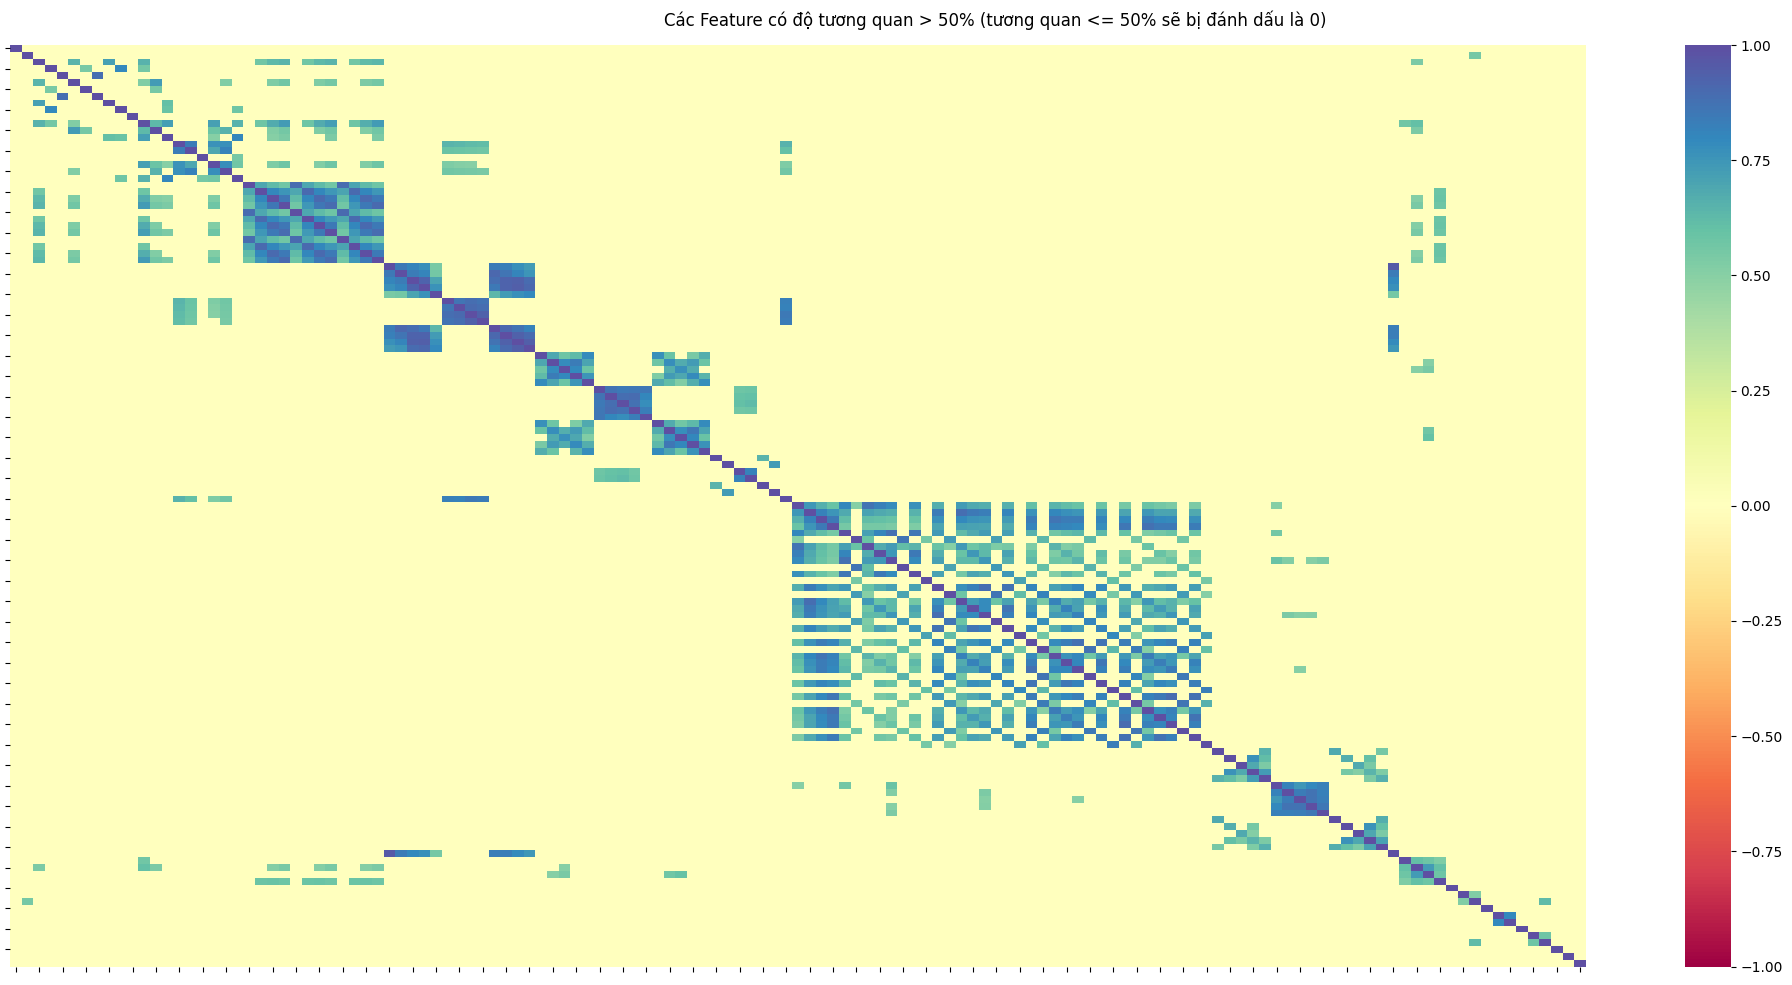

In [ ]:
df_temp = df.copy(deep=True)
plt.figure(figsize=(20,10))
sns.heatmap(df_temp.corr().applymap(lambda x: 0 if x < .5 else x), cmap='Spectral', vmin=-1, vmax=1)
plt.xticks(rotation=30)
plt.gca().set_xticklabels([])  # Remove x-tick labels
plt.gca().set_yticklabels([])  # Remove y-tick labels
plt.suptitle(f'Các Feature có độ tương quan > 50% (tương quan <= 50% sẽ bị đánh dấu là 0)')
plt.tight_layout()

# Drop corr > 0.5

In [ ]:
df_temp = df.copy(deep=True)
corr_matrix = df_temp.corr()
filtered_corr = df_temp.corr().applymap(lambda x: x if abs(x) > 0.5 and x != 1 else np.nan)

upper_tri = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
high_corr_pairs = filtered_corr.where(upper_tri).stack()

# Step 3: Drop one column for each pair of highly correlated features
to_drop = set()
for col1, col2 in high_corr_pairs.index:
    if col1 not in to_drop and col2 not in to_drop:
        to_drop.add(col2)  # Keep col1, drop col2

# Step 4: Drop the identified columns
df_reduced = df_temp.drop(columns=to_drop)

print(f"Columns to drop: {to_drop}")
print(f"Reduced dataframe shape: {df_reduced.shape}")

Columns to drop: {'ENQUIRIES_FOR_LOAN_9M', 'ENQUIRIES_FROM_BANK_FOR_CC_6M', 'ENQUIRIES_FROM_NON_BANK_FOR_CC_6M', 'ENQUIRIES_FROM_BANK_FOR_LOAN_9M', 'NUM_NEW_LOAN_TAKEN_BANK_3M', 'ENQUIRIES_FROM_NON_BANK_3M_12M', 'ENQUIRIES_FOR_LOAN_12M', 'OUTSTANDING_BAL_LOAN_3M_12M', 'NUMBER_OF_RELATIONSHIP_NON_BANK', 'OUTSTANDING_BAL_CC_9M', 'INCREASING_BAL_6M_ALL', 'NUMBER_OF_RELATIONSHIP_BANK', 'ENQUIRIES_FROM_NON_BANK_FOR_LOAN_6M', 'ENQUIRIES_3M_12M', 'OUTSTANDING_BAL_CC_9M_12M', 'OUTSTANDING_BAL_CC_3M', 'ENQUIRIES_FROM_BANK_12M', 'ENQUIRIES_9M', 'OUTSTANDING_BAL_LOAN_12M', 'MID_TERM_COUNT_BANK', 'OUTSTANDING_BAL_ALL_6M_12M', 'ENQUIRIES_FROM_NON_BANK_6M_9M', 'OUTSTANDING_BAL_LOAN_6M_9M', 'ENQUIRIES_6M', 'ENQUIRIES_FROM_BANK_9M_12M', 'NUM_NEW_LOAN_TAKEN_BANK_6M', 'ENQUIRIES_FROM_NON_BANK_3M', 'ENQUIRIES_FROM_NON_BANK_3M_6M', 'ENQUIRIES_FROM_NON_BANK_6M_12M', 'NUMBER_OF_LOANS', 'OUTSTANDING_BAL_ALL_CURRENT', 'ENQUIRIES_FOR_CC_12M', 'ENQUIRIES_12M', 'MID_TERM_COUNT_NON_BANK', 'OUTSTANDING_BAL_CC_6M_1

<ipython-input-77-7387334f05f2>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  filtered_corr = df_temp.corr().applymap(lambda x: x if abs(x) > 0.5 and x != 1 else np.nan)


# Result

In [ ]:
df_reduced.shape

(20000, 32)

In [ ]:
df_reduced.columns

Index(['customer_id', 'label', 'SHORT_TERM_COUNT', 'MID_TERM_COUNT',
       'LONG_TERM_COUNT', 'LONG_TERM_COUNT_NON_BANK', 'NUMBER_OF_LOANS_BANK',
       'NUMBER_OF_LOANS_NON_BANK', 'NUMBER_OF_CREDIT_CARDS',
       'NUMBER_OF_CREDIT_CARDS_NON_BANK', 'NUM_NEW_LOAN_TAKEN_3M',
       'OUTSTANDING_BAL_LOAN_CURRENT', 'OUTSTANDING_BAL_LOAN_3M_6M',
       'OUTSTANDING_BAL_CC_3M_6M', 'OUTSTANDING_BAL_ALL_9M_12M',
       'INCREASING_BAL_3M_LOAN', 'INCREASING_BAL_6M_LOAN', 'ENQUIRIES_3M',
       'ENQUIRIES_FROM_NON_BANK_FOR_LOAN_3M',
       'ENQUIRIES_FROM_NON_BANK_FOR_CC_3M', 'ENQUIRIES_3M_6M',
       'ENQUIRIES_6M_9M', 'ENQUIRIES_9M_12M', 'ENQUIRIES_FROM_BANK_6M_9M',
       'Diff_in_term_count', 'RATIO_SHORT', 'RATIO_SHORT_BANK',
       'RATIO_SHORT_NON_BANK', 'RATIO_MID_NON_BANK', 'RATIO_RELATIONSHIP',
       'RATIO_RELATIONSHIP_BANK', 'RATIO_RELATIONSHIP_NON_BANK'],
      dtype='object')

<ipython-input-81-adfac76fd45b>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sns.heatmap(df_temp.corr().applymap(lambda x: 0 if x <= .5 else x), cmap='Spectral', vmin=-1, vmax=1)


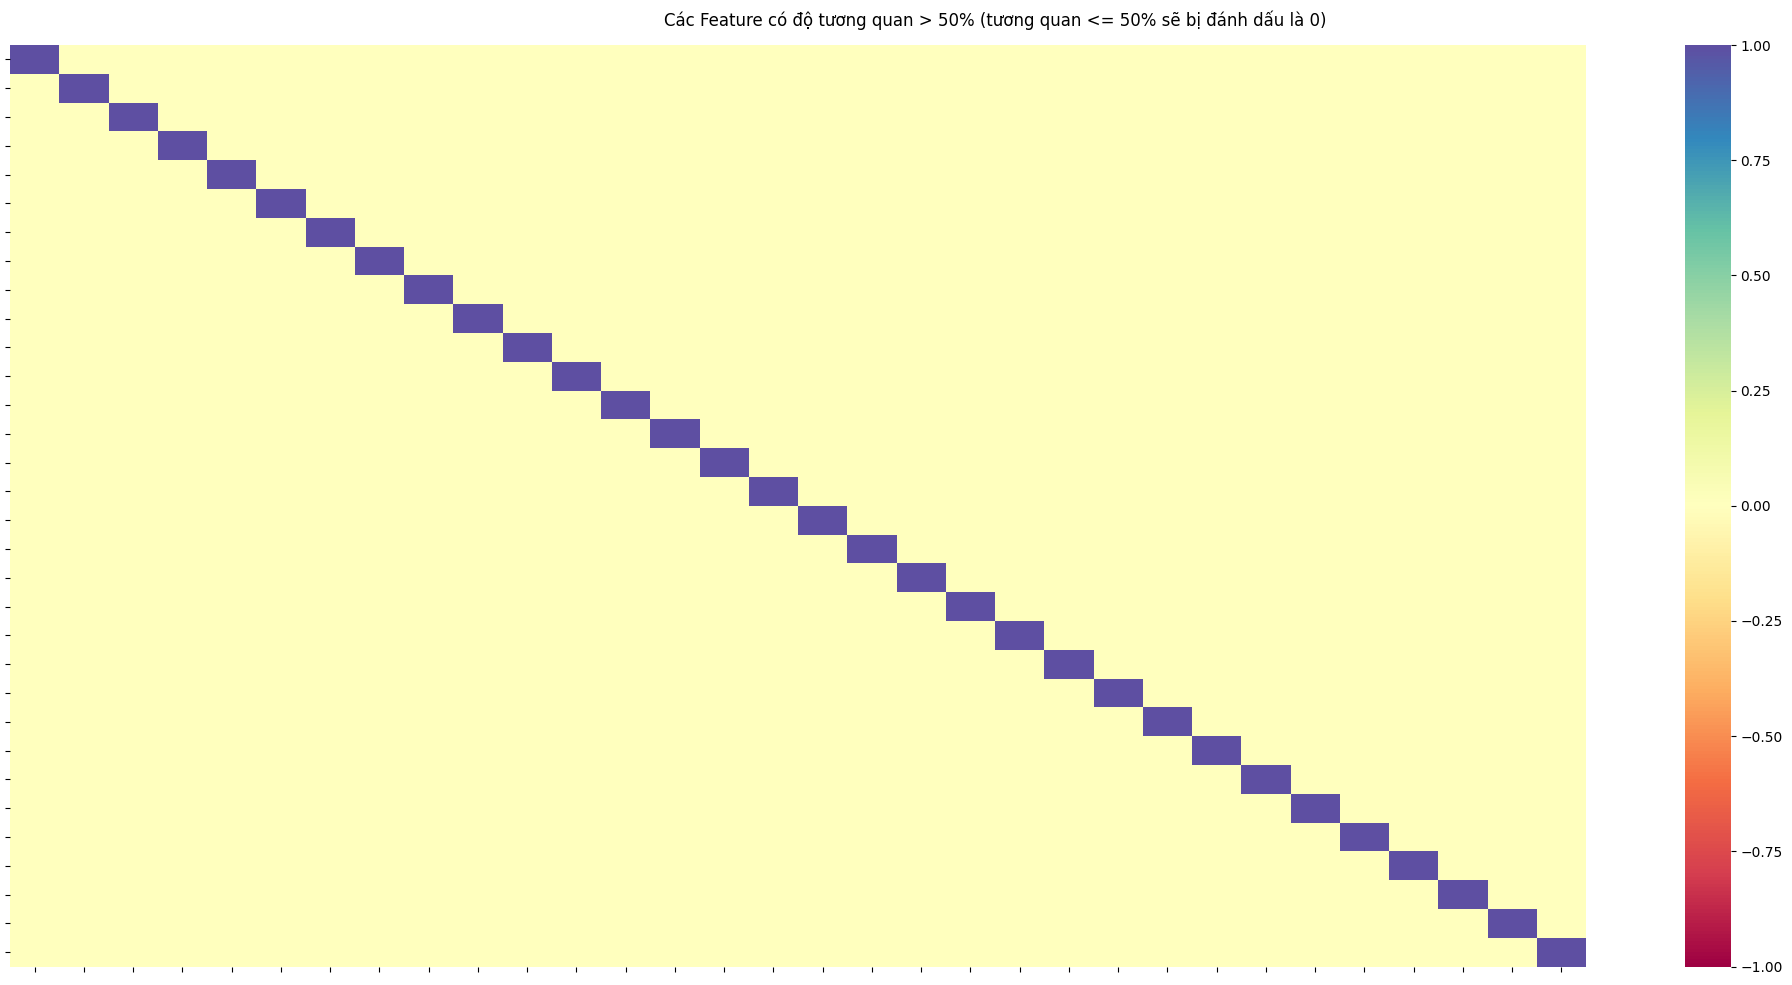

In [ ]:
df_temp = df_reduced.copy(deep=True)
plt.figure(figsize=(20,10))
sns.heatmap(df_temp.corr().applymap(lambda x: 0 if x <= .5 else x), cmap='Spectral', vmin=-1, vmax=1)
plt.xticks(rotation=30)
plt.gca().set_xticklabels([])  # Remove x-tick labels
plt.gca().set_yticklabels([])  # Remove y-tick labels
plt.suptitle(f'Các Feature có độ tương quan > 50% (tương quan <= 50% sẽ bị đánh dấu là 0)')
plt.tight_layout()

In [ ]:
df_reduced.to_csv